In [31]:
import numpy as np
import emcee
import dlsfunctions as dls
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
r = 2.2439608235145855e-09
diameter = r * 2
sigma = 5e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

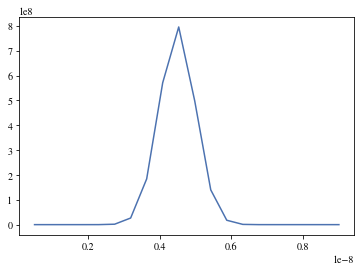

In [49]:
plt.plot(d, f_1)

In [34]:
theta_input = np.append(f_1, beta)

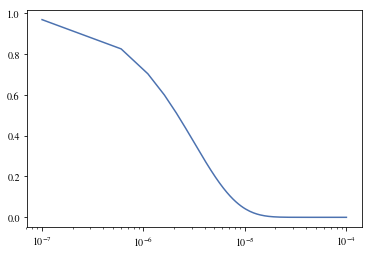

In [35]:
sim_data = dls.g2(theta_input, d, gamma, time_in)
plt.semilogx(time_in, sim_data)

In [36]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [37]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [38]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [39]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.34833333, 0.35733333, 0.37266667, 0.361     , 0.359     ,
       0.36533333, 0.36433333, 0.378     , 0.379     , 0.353     ,
       0.339     , 0.36966667, 0.355     , 0.36166667, 0.352     ,
       0.35733333, 0.36666667, 0.35733333, 0.35566667, 0.34566667,
       0.36466667, 0.36066667, 0.37033333, 0.39133333, 0.36233333,
       0.37266667, 0.37566667, 0.34866667, 0.36766667, 0.36666667,
       0.36266667, 0.35966667, 0.37533333, 0.359     , 0.34366667,
       0.368     , 0.35433333, 0.35433333, 0.37566667, 0.368     ,
       0.362     , 0.34733333, 0.36966667, 0.37166667, 0.34633333,
       0.37233333, 0.36433333, 0.368     , 0.361     , 0.36766667,
       0.34866667, 0.35066667, 0.38666667, 0.352     , 0.36633333,
       0.36133333, 0.367     , 0.34766667, 0.36333333, 0.36966667,
       0.35733333, 0.37333333, 0.37466667, 0.359     , 0.365     ,
       0.38833333, 0.37133333, 0.36366667, 0.33533333, 0.348     ,
       0.35666667, 0.346     , 0.369     , 0.36366667, 0.351  

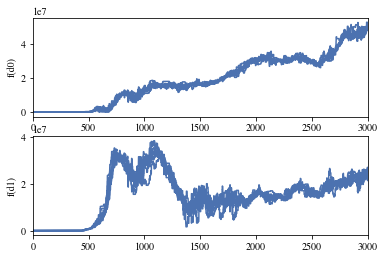

In [40]:
dls.view_burnin_plot(result, 0, 1)

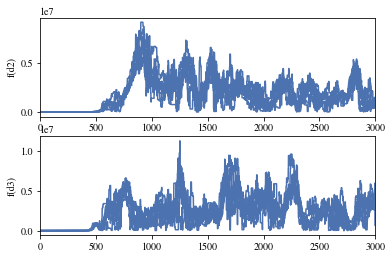

In [41]:
dls.view_burnin_plot(result, 2, 3)

In [ ]:
dls.view_burnin_plot(result, 4, 5)

In [ ]:
dls.view_burnin_plot(result, 6, 7)

chained_sampler = dls.chain(result, 4300, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)

inferred_f = dls.get_infer_f(samples_df, m)

inferred_f.shape

plt.plot(d, inferred_f)

In [42]:
samples = result.chain[:,2500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [43]:
q = q.quantile([0.5], axis=0)
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.5,1.229798,4.135408e+07,2.053864e+07,5.372504e+08,2.486400e+08,9.307043e+07,1.470207e+06,1.450855e+07,3.523995e+06,2.484963e+08,...,1.013700e+08,1.440417e+08,1.471970e+06,2.477223e+06,6.651008e+06,280697.544671,1.617468e+07,4.009422e+08,5.445224e+08,6.836271e+08


In [44]:
q = q.values
q = q.flatten()
q = q[0:20]

In [45]:
q.shape

(20,)

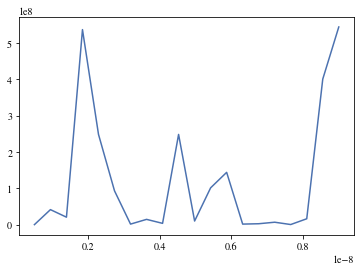

In [46]:
plt.plot(d, q)

In [47]:
dls.check_distribution_norm(q, d[1]- d[0])

0.9683112319627176

In [ ]:
infer_g2 = dls.g2(np.append(q, 1), d, m, gamma, time_in)

In [ ]:
plt.semilogx(time_in, infer_g2, label='Inferred g2')
plt.semilogx(time_in, sim_data, 'r', label='Simulated data')
plt.legend()

In [ ]:
plt.semilogx(time_in, sim_data)

In [ ]:
diameter2 = diameter - 3e-9
f_2 = dls.generate_distribution(d, diameter2, sigma, 1)

In [ ]:
plt.plot(d, f_2)

In [ ]:
theta_input2 = np.append(f_2, beta)
sim_data2 = dls.g2(theta_input2, d, gamma, time_in)

In [ ]:
dls.log_prior(theta_input, m)

In [ ]:
dls.log_likelihood(theta_input, d, sim_data, gamma, time_in)